In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../')
from utiliT.io import read_pickle, dump_pickle
from scripts.instance import *
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data_files = os.listdir("../data")
res_files = os.listdir("../results/run_results")
result_dicts = [read_pickle(f"../results/run_results/{f}") for f in res_files]
results = pd.DataFrame(result_dicts)
instance_names = [x['instance_name'] for x in result_dicts]
instance_counts = pd.DataFrame(np.unique(instance_names, return_counts=True)).T
instance_counts.columns = ['instance', 'count']
le36 = instance_counts[instance_counts['count'] < 27]
le36

,instance,count
120,normal_50_200_100,24
121,normal_50_200_200,24
122,normal_50_200_300,24
123,normal_50_200_400,24
124,normal_50_50_100,24
125,normal_50_50_200,24
126,normal_50_50_300,24
127,normal_50_50_400,24


In [32]:
results[results['instance_name'] == 'normal_50_200_100']

,grouping_method,obj_val,dr,cut_method,n_cuts,n_iterations,avg_mp_solve,avg_benders_loop_solve,status,primal_gap,...,runtime,n1,n2,m1,m2,k,distribution,clustering_runtime,instance_name,run_number
3528,affinity,27967.412038,False,dropout,105,13,0.000621,0.118387,optimal,0.000000e+00,...,2.182504,50,200,100,400,100,normal,0.113467,normal_50_200_100,0
3529,affinity,27967.412038,False,dropout,105,13,0.000000,0.118333,optimal,0.000000e+00,...,2.114190,50,200,100,400,100,normal,0.109376,normal_50_200_100,1
3530,affinity,27967.412038,False,dropout,105,13,0.000470,0.114900,optimal,0.000000e+00,...,2.136457,50,200,100,400,100,normal,0.116493,normal_50_200_100,2
3531,hierarchical,27966.093242,False,dropout,13,7,0.002260,0.025254,optimal,0.000000e+00,...,0.494120,50,200,100,400,100,normal,0.060125,normal_50_200_100,0
3532,hierarchical,27966.093242,False,dropout,13,7,0.000120,0.027564,optimal,0.000000e+00,...,0.476681,50,200,100,400,100,normal,0.047826,normal_50_200_100,1
3533,hierarchical,27966.093242,False,dropout,13,7,0.000571,0.026530,optimal,0.000000e+00,...,0.506004,50,200,100,400,100,normal,0.058201,normal_50_200_100,2
3534,kmeans,27970.047405,False,dropout,20,11,0.000091,0.027183,optimal,0.000000e+00,...,1.000648,50,200,100,400,100,normal,0.335902,normal_50_200_100,0
3535,kmeans,27968.290339,False,dropout,15,8,0.001954,0.029969,optimal,0.000000e+00,...,0.837195,50,200,100,400,100,normal,0.347357,normal_50_200_100,1
3536,kmeans,27969.911329,False,dropout,28,15,0.000050,0.025249,optimal,0.000000e+00,...,1.196323,50,200,100,400,100,normal,0.331805,normal_50_200_100,2
3537,random,27977.468477,False,dropout,41,9,0.000222,0.067626,optimal,0.000000e+00,...,1.014360,50,200,100,400,100,normal,0.062273,normal_50_200_100,0


In [29]:
#dropout_results = results[results['cut_method'] == 'dropout']
dropout_results = results.groupby(by = ['grouping_method','cut_method', 'instance_name']).count()
dropout_results[dropout_results['obj_val'] < 3]

,,,obj_val,dr,n_cuts,n_iterations,avg_mp_solve,avg_benders_loop_solve,status,primal_gap,primal_gap_perc,runtime,n1,n2,m1,m2,k,distribution,clustering_runtime,run_number
grouping_method,cut_method,instance_name,,,,,,,,,,,,,,,,,,


In [30]:
results[
    (results['instance_name'] == 'normal_50_150_400') & (results['cut_method'] == 'hybrid')
]

,grouping_method,obj_val,dr,cut_method,n_cuts,n_iterations,avg_mp_solve,avg_benders_loop_solve,status,primal_gap,...,runtime,n1,n2,m1,m2,k,distribution,clustering_runtime,instance_name,run_number
3516,affinity,24612.076294,False,hybrid,271,16,0.001229,1.570710,optimal,0.0,...,26.387762,50,150,100,300,400,normal,0.618775,normal_50_150_400,0
3517,affinity,24612.076294,False,hybrid,271,16,0.000187,1.554243,optimal,0.0,...,26.135294,50,150,100,300,400,normal,0.612584,normal_50_150_400,1
3518,affinity,24612.076294,False,hybrid,271,16,0.001254,1.574404,optimal,0.0,...,26.867813,50,150,100,300,400,normal,0.660482,normal_50_150_400,2
3519,kmeans,24612.061674,False,hybrid,152,19,0.001103,2.467421,optimal,0.0,...,50.976443,50,150,100,300,400,normal,3.199008,normal_50_150_400,0
3520,kmeans,24612.075218,False,hybrid,152,19,0.000208,1.496600,optimal,0.0,...,32.388786,50,150,100,300,400,normal,3.273284,normal_50_150_400,1
3521,kmeans,24612.070903,False,hybrid,152,19,0.000876,1.511499,optimal,0.0,...,31.014281,50,150,100,300,400,normal,1.685194,normal_50_150_400,2


In [21]:
results[results['instance_name'] == 'multipeak_50_100_100'].head(27)

,grouping_method,obj_val,dr,cut_method,n_cuts,n_iterations,avg_mp_solve,avg_benders_loop_solve,status,primal_gap,...,runtime,n1,n2,m1,m2,k,distribution,clustering_runtime,instance_name,run_number
1296,affinity,14305.611668,False,dropout,88,9,0.001736,0.099417,optimal,0.000000e+00,...,1.370323,50,100,100,200,100,multipeak,0.065464,multipeak_50_100_100,0
1297,affinity,14305.611668,False,dropout,88,9,0.000444,0.106967,optimal,0.000000e+00,...,1.411726,50,100,100,200,100,multipeak,0.062495,multipeak_50_100_100,1
1298,affinity,14305.611668,False,dropout,88,9,0.001848,0.104143,optimal,0.000000e+00,...,1.370057,50,100,100,200,100,multipeak,0.070800,multipeak_50_100_100,2
1299,hierarchical,14177.066390,False,dropout,35,20,0.000150,0.018766,optimal,0.000000e+00,...,0.960762,50,100,100,200,100,multipeak,0.022176,multipeak_50_100_100,0
1300,hierarchical,14177.066390,False,dropout,35,20,0.000351,0.016183,optimal,0.000000e+00,...,1.028296,50,100,100,200,100,multipeak,0.032465,multipeak_50_100_100,1
1301,hierarchical,14177.066390,False,dropout,35,20,0.000200,0.016595,optimal,0.000000e+00,...,1.023239,50,100,100,200,100,multipeak,0.032450,multipeak_50_100_100,2
1302,kmeans,14261.796021,False,dropout,23,15,0.000065,0.018757,optimal,1.455192e-11,...,0.945588,50,100,100,200,100,multipeak,0.281743,multipeak_50_100_100,0
1303,kmeans,14220.807268,False,dropout,32,17,0.000000,0.019738,optimal,-5.456968e-12,...,1.101485,50,100,100,200,100,multipeak,0.296881,multipeak_50_100_100,1
1304,kmeans,14247.687511,False,dropout,20,12,0.001312,0.015616,optimal,1.818989e-12,...,0.832099,50,100,100,200,100,multipeak,0.281243,multipeak_50_100_100,2
1305,random,14296.019621,False,dropout,100,10,0.000000,0.106658,optimal,0.000000e+00,...,1.513668,50,100,100,200,100,multipeak,0.052443,multipeak_50_100_100,0


In [14]:
ge36 = instance_counts[instance_counts['count'] >= 36]
ge36

,instance,count
80,normal_150_100_100,36
81,normal_150_100_200,36
82,normal_150_100_300,36
83,normal_150_100_400,36
84,normal_150_150_100,36
...,...,...
187,uniform_50_200_400,36
188,uniform_50_50_100,36
189,uniform_50_50_200,36
190,uniform_50_50_300,36


In [2]:
if os.path.isfile("../results/compiled_results/experimental_results.csv"):
    df = pd.read_csv("../results/compiled_results/experimental_results.csv", index_col=0)
else:
    result_files = os.listdir("../results/run_results")
    result_dicts = [read_pickle(f"../results/run_results/{file}") for file in result_files]
    df = pd.DataFrame(result_dicts)
    df['n_var'] = df['n1'] + df['n2'] * df['k']
    df['dropout']  = df['method'].apply(lambda x: 'dropout' in x)
    df['dr']  = df['method'].apply(lambda x: 'True' in x)
    df['group_method'] = df['method'].apply(lambda x: x.split('-')[0])
    df.to_csv("../results/compiled_results/experimental_results.csv")

c_times = pd.read_csv('../results/compiled_results/clustering_info.csv', index_col=0)
c_times.columns = ['group_method', 'dr','clustering_runtime','n1','n2','k','distribution']
df = df.merge(c_times, how = 'left', on = ['group_method', 'dr','n1','n2','k','distribution'])
df = df.fillna(0)
df['adj_runtime'] = df['runtime'] - df['clustering_runtime']
df.head()

,method,obj_val,n_cuts,n_iterations,avg_mp_solve,avg_benders_loop_solve,status,primal_gap,primal_gap_perc,runtime,...,m2,k,distribution,instance_name,n_var,dropout,dr,group_method,clustering_runtime,adj_runtime
0,affinity-hybrid-cut-False,26917.826205,227,19,0.002684,0.428854,optimal,0.0,0.0,9.134913,...,200,100,multipeak,multipeak_100_100_100,10100,False,False,affinity,0.119505,9.015408
1,affinity-hybrid-cut-True,26917.815398,223,17,0.003059,0.452289,optimal,0.0,0.0,8.616943,...,200,100,multipeak,multipeak_100_100_100,10100,False,True,affinity,0.126537,8.490406
2,affinity-ND-dropout-False,26848.552499,127,13,0.002998,0.254611,optimal,0.0,0.0,4.033000,...,200,100,multipeak,multipeak_100_100_100,10100,True,False,affinity,0.119505,3.913496
3,affinity-ND-dropout-True,26862.831930,109,10,0.002999,0.290277,optimal,0.0,0.0,3.511913,...,200,100,multipeak,multipeak_100_100_100,10100,True,True,affinity,0.126537,3.385376
4,hierarchical-hybrid-cut-False,26917.796496,121,25,0.001795,0.258855,optimal,0.0,0.0,7.683923,...,200,100,multipeak,multipeak_100_100_100,10100,False,False,hierarchical,0.071529,7.612395


[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

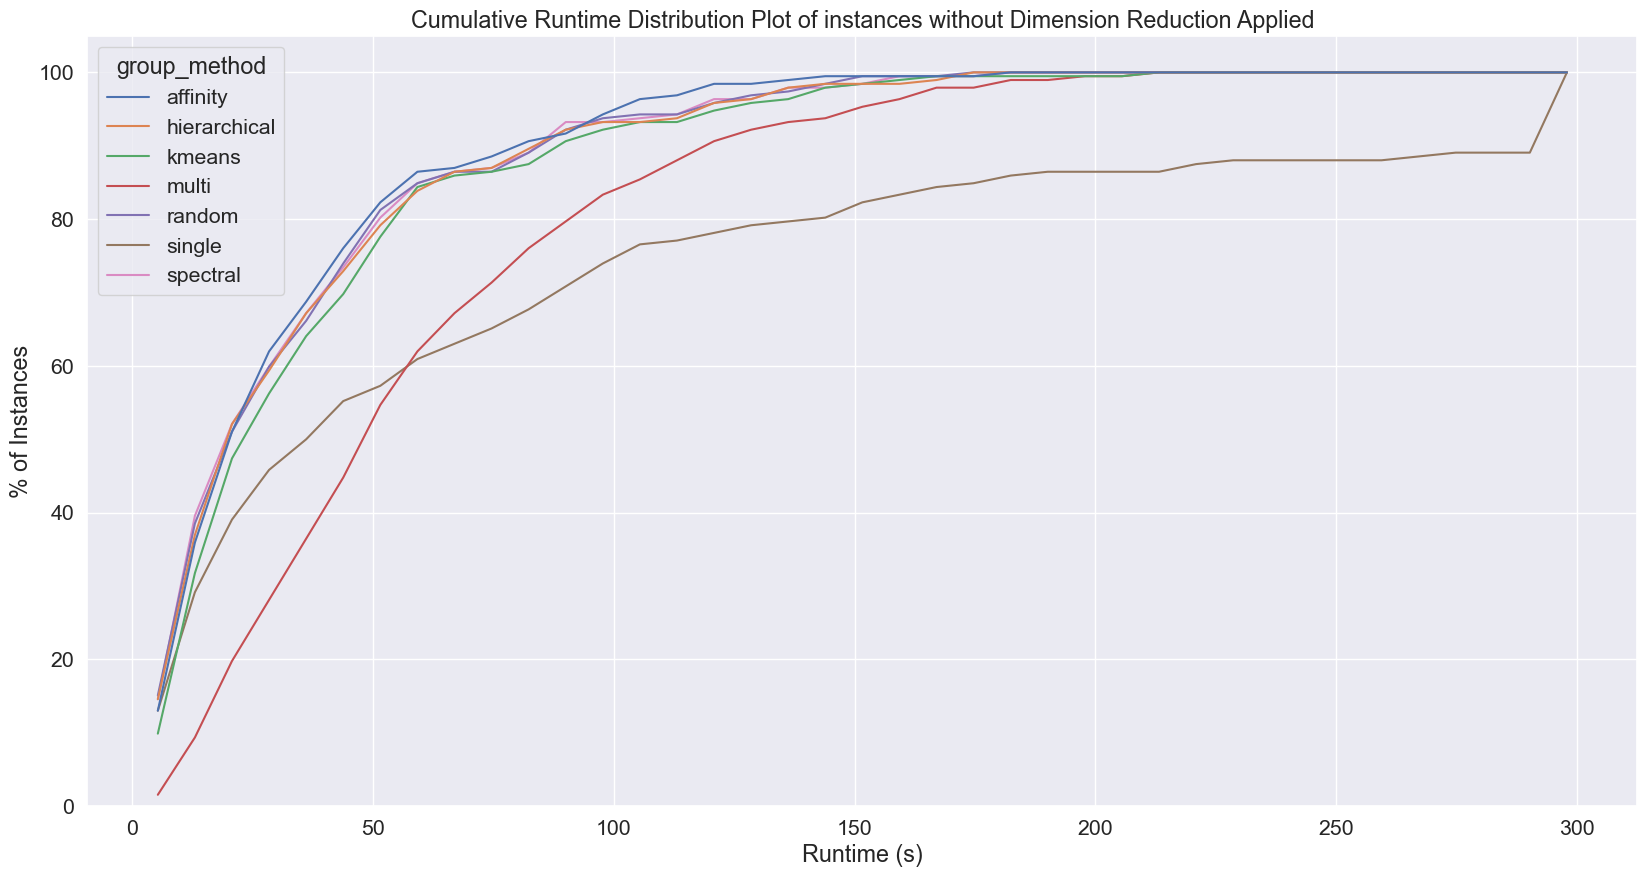

In [20]:
# Cumulative Runtime Distribution Plot without PCA no Dropout

subset = df[(~df['dropout']) & (~df['dr'])]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'runtime',hue = 'group_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Runtime Distribution Plot of instances w/o Dimension Reduction Applied')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

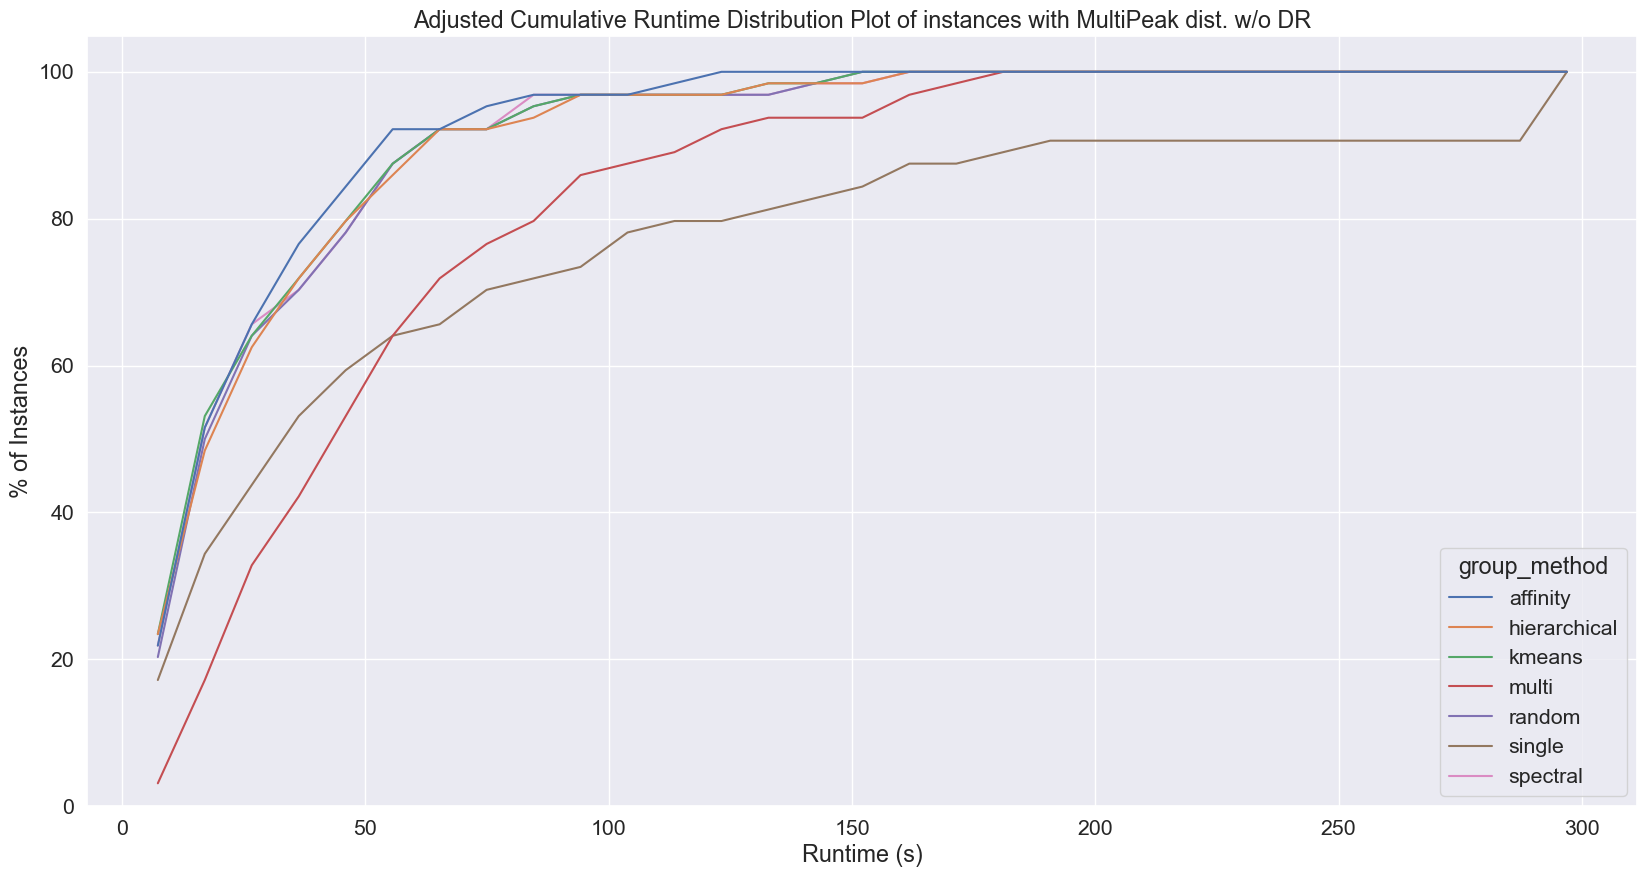

In [26]:
# Adjusted Cumulative Runtime Distribution Plot without PCA no Dropout

subset = df[(~df['dropout']) & (~df['dr']) & (df['distribution'] == 'multipeak')]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'adj_runtime',hue = 'group_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Adjusted Cumulative Runtime Distribution Plot of instances with MultiPeak dist. w/o DR')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

EVERYTHING ABOVE

In [ ]:
# Adjusted Cumulative Runtime Distribution Plot without PCA no Dropout

subset = df[(~df['dropout']) & (~df['dr']) & ()]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'adj_runtime',hue = 'group_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Adjusted Cumulative Runtime Distribution Plot of instances w/o Dimension Reduction Applied')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

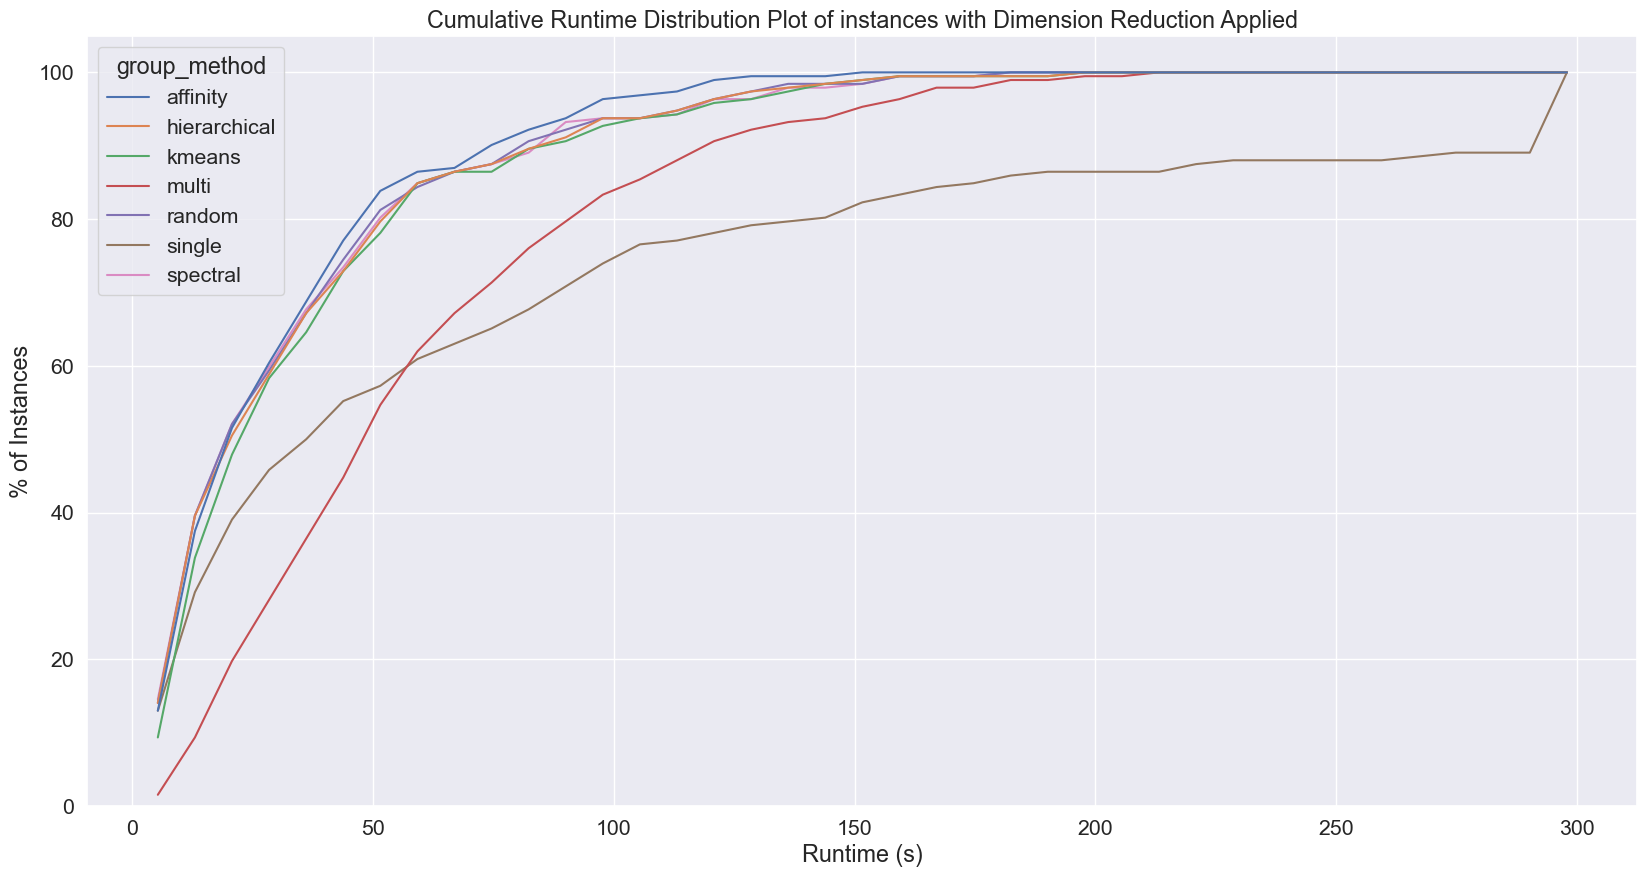

In [22]:
# Cumulative Runtime Distribution Plot With PCA no Dropout

subset = df[(~df['dropout']) & (df['dr']) | (df['group_method'] == 'single') | (df['group_method'] == 'multi')]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'runtime',hue = 'group_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Runtime Distribution Plot of instances w/ Dimension Reduction Applied')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

In [ ]:
subset = df[(~df['dropout']) & (~df['PCA'])]
order_df = subset[['method','runtime']]
order_df = order_df.groupby(by = 'method').mean()
order_df = order_df.sort_values(by = 'runtime')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(data = subset, x = 'method', y = 'runtime', ax = ax, order = order)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.boxplot(data = runtime_df,x = 'SOLUTION TIME',y = 'method', ax = ax)
plot.set(title='Runtime Spread')
plot.set(xlabel='Runtime (s)', ylabel='method')

<AxesSubplot:xlabel='k', ylabel='runtime'>

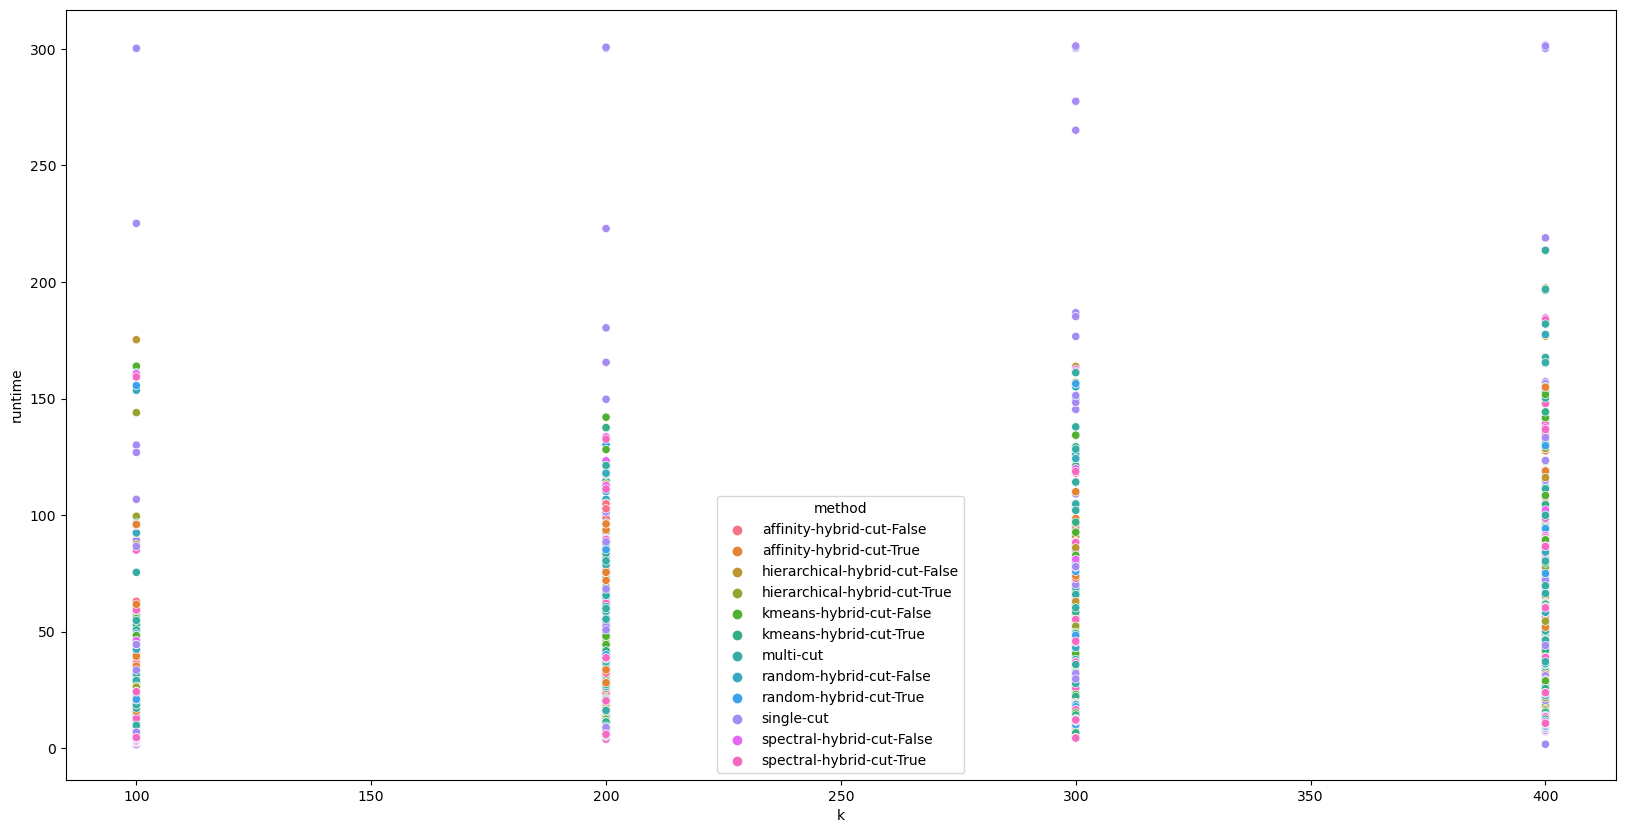

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
subset = df[~df['dropout']]
sns.scatterplot(data = subset, y = 'runtime', x = 'k', hue = 'method', ax = ax)

<AxesSubplot:xlabel='method', ylabel='runtime'>

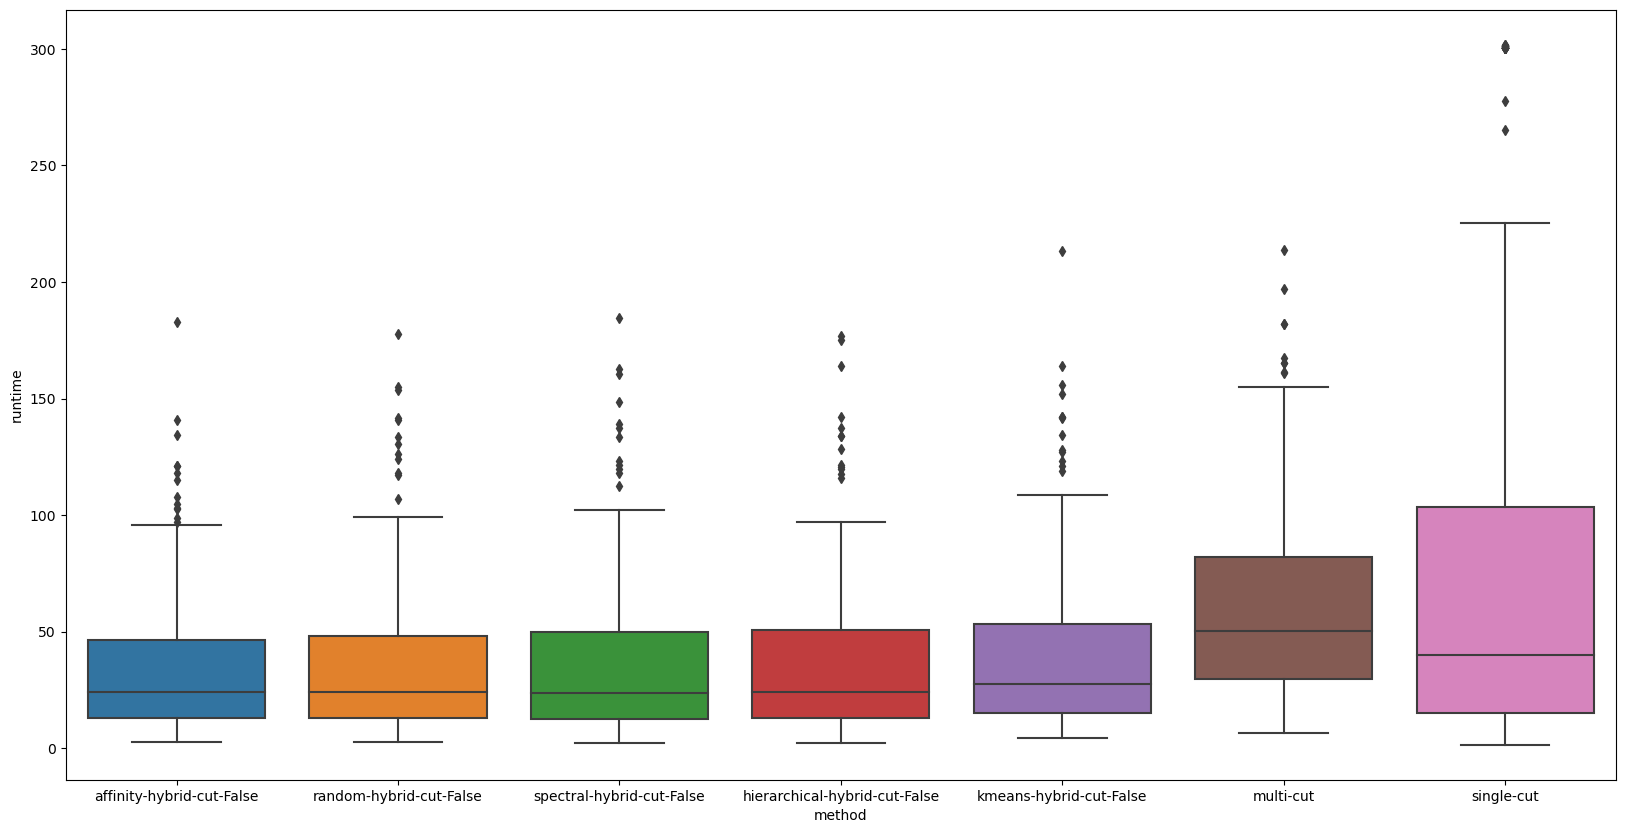

In [24]:
subset = df[(~df['dropout']) & (~df['PCA'])]
order_df = subset[['method','runtime']]
order_df = order_df.groupby(by = 'method').mean()
order_df = order_df.sort_values(by = 'runtime')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(data = subset, x = 'method', y = 'runtime', ax = ax, order = order)

<AxesSubplot:xlabel='method', ylabel='runtime'>

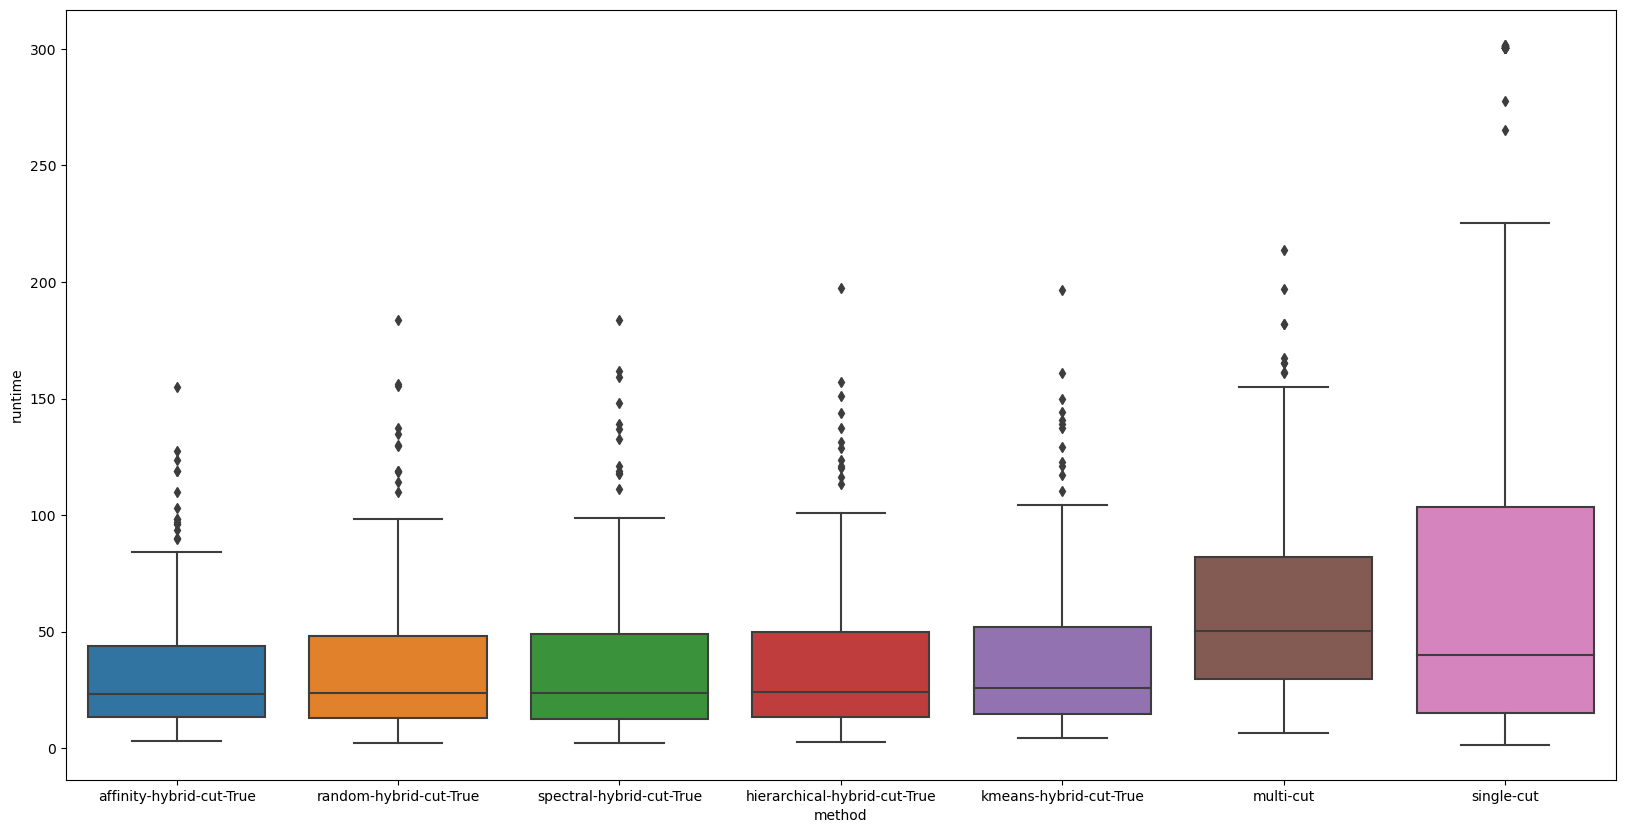

In [52]:
subset = df[(~df['dropout']) & (df['PCA'])]
single_and_multi = df[(df['method'] == 'single-cut') | (df['method'] == 'multi-cut')]
subset = pd.concat([subset, single_and_multi])
order_df = subset[['method','runtime']]
order_df = order_df.groupby(by = 'method').mean()
order_df = order_df.sort_values(by = 'runtime')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(data = subset, x = 'method', y = 'runtime', ax = ax, order = order)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

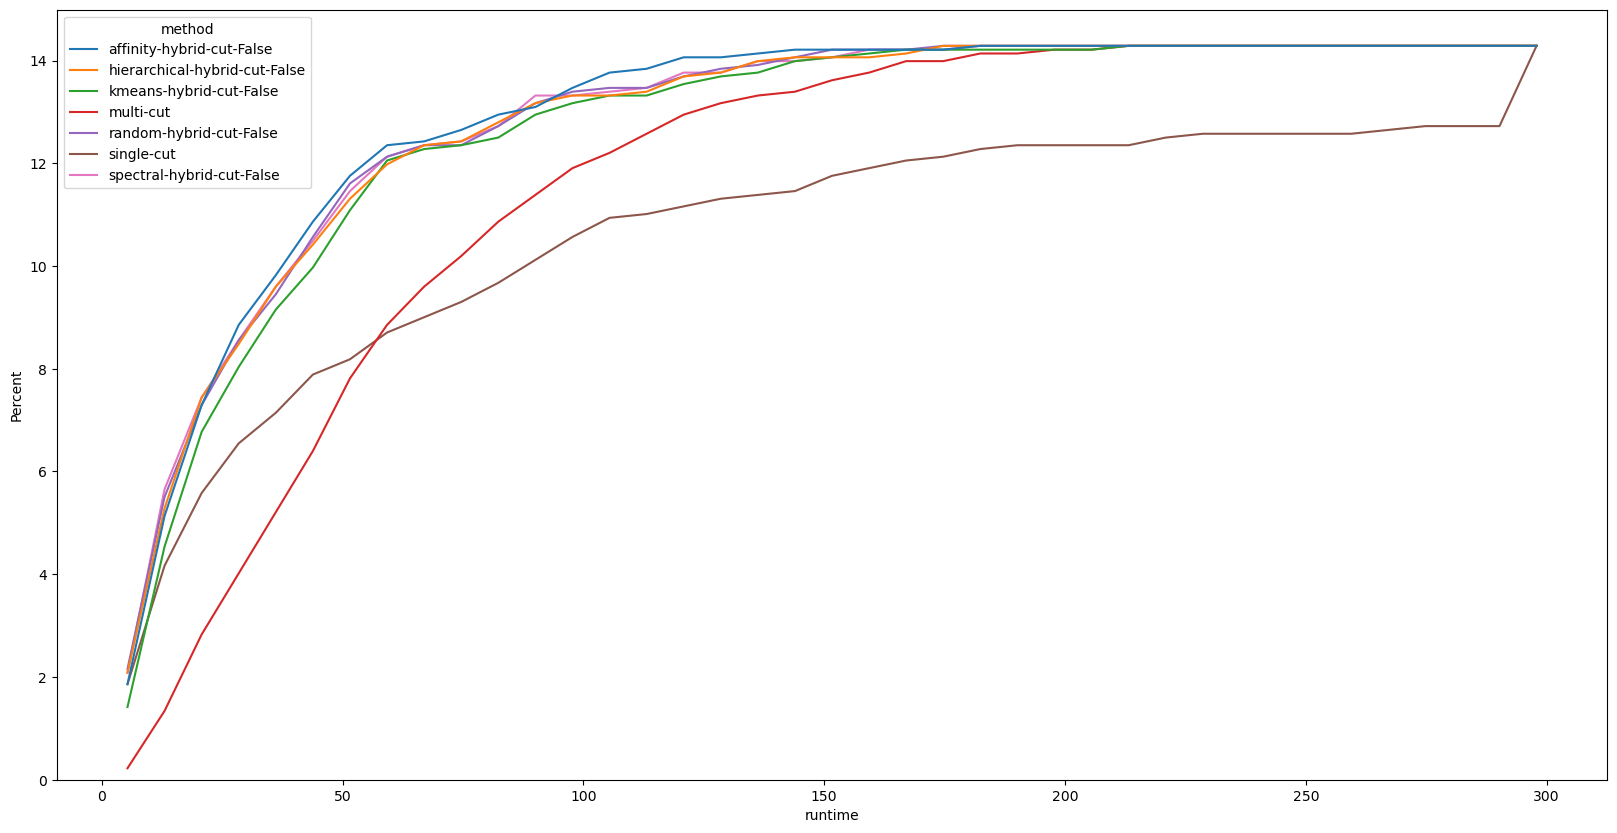

In [38]:
subset = df[(~df['dropout']) & (~df['PCA'])]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

In [ ]:
subset = df[(~df['dropout']) & (~df['PCA'])]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

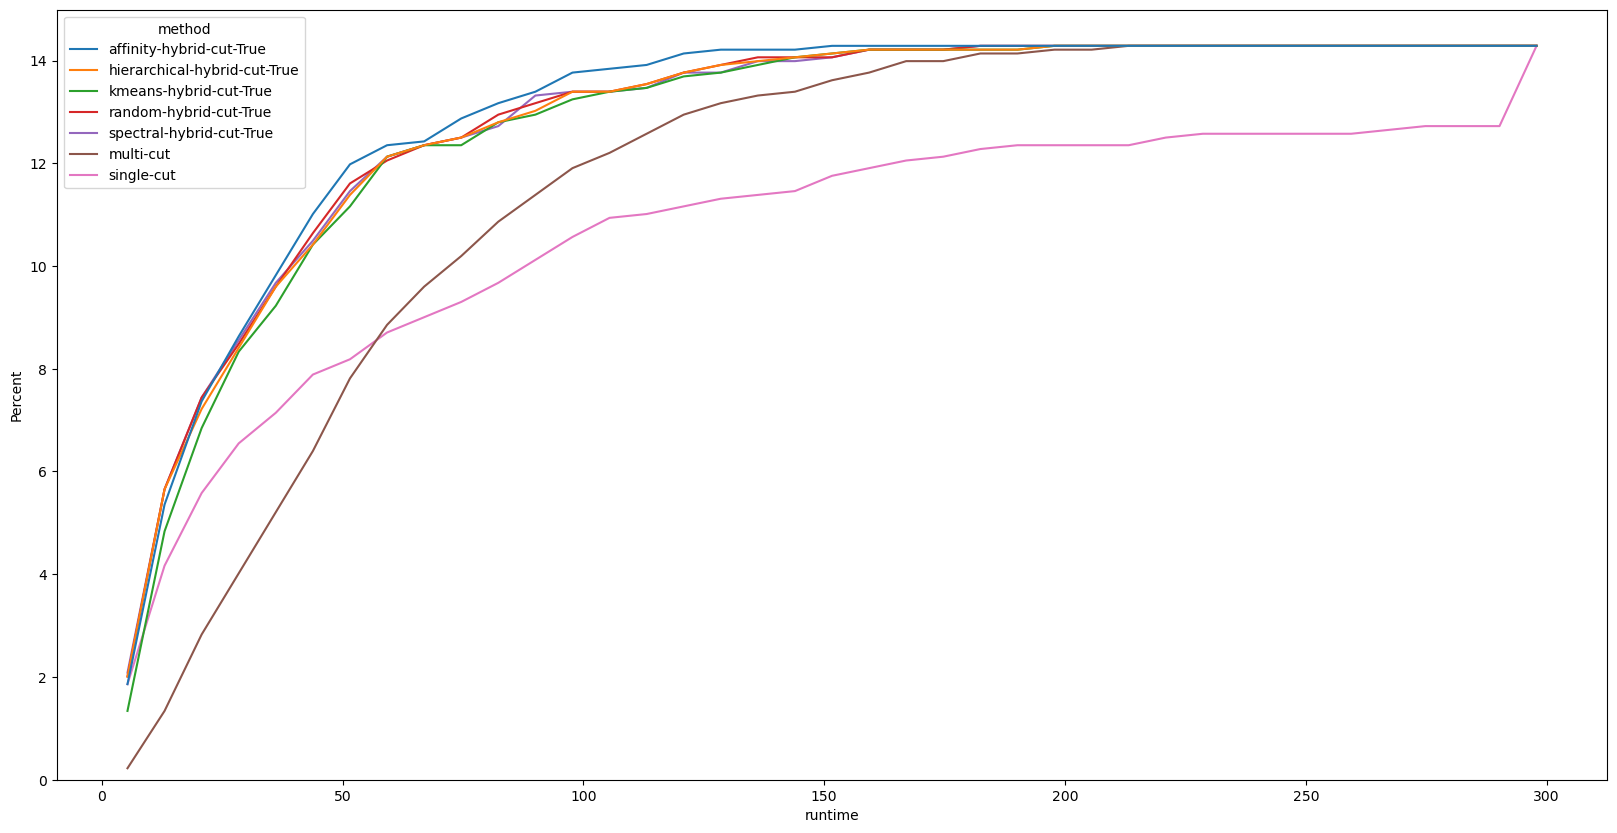

In [39]:
subset = df[(~df['dropout']) & (df['PCA'])]
single_and_multi = df[(df['method'] == 'single-cut') | (df['method'] == 'multi-cut')]
subset = pd.concat([subset, single_and_multi])
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

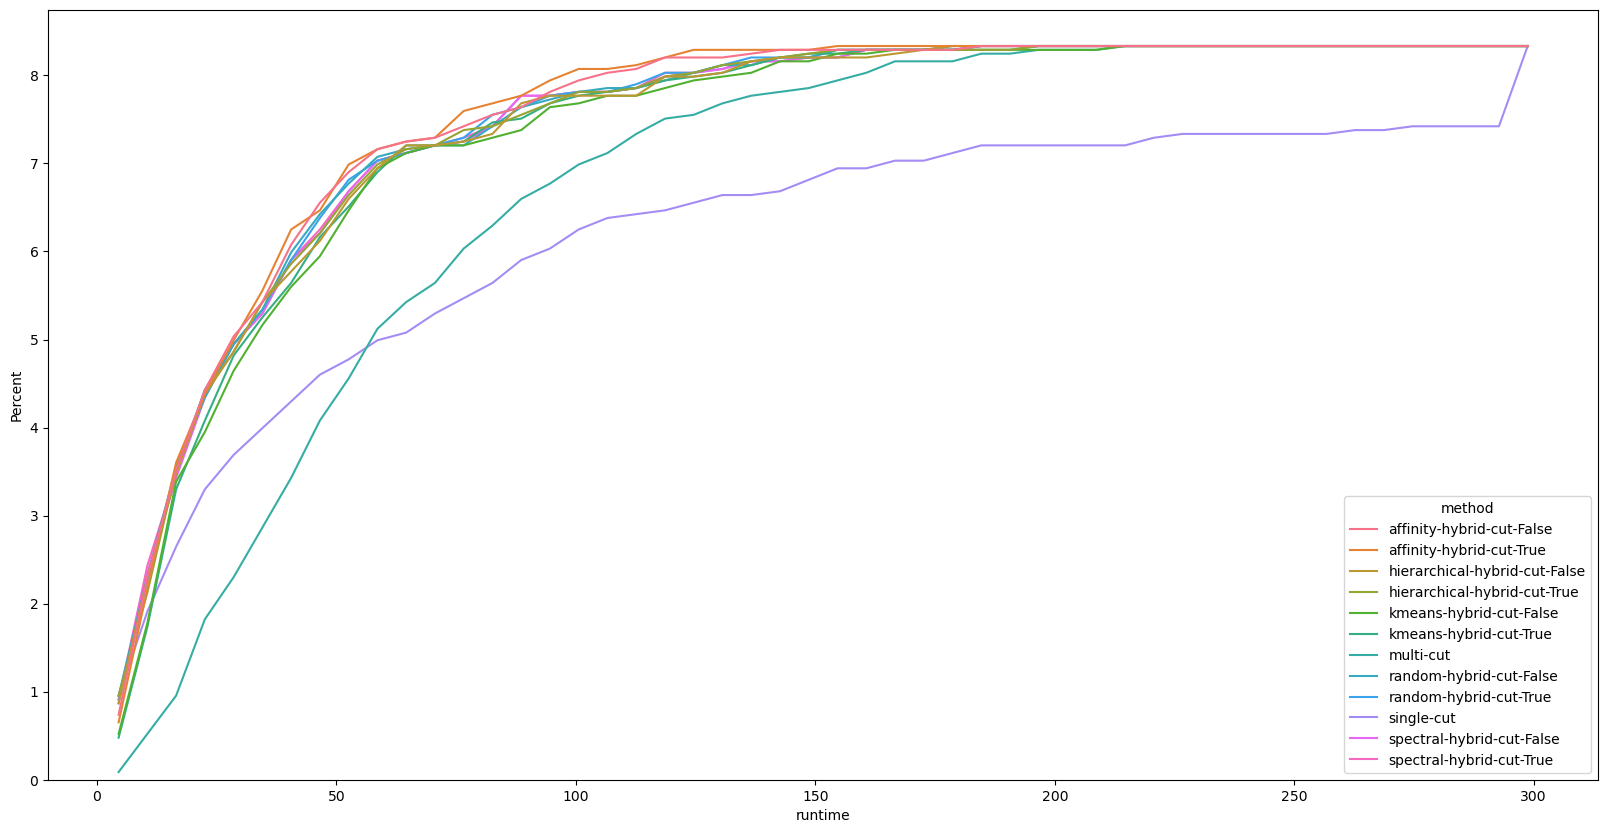

In [42]:
subset = df[~df['dropout']]
#single_and_multi = df[(df['method'] == 'single-cut') | (df['method'] == 'multi-cut')]
#subset = pd.concat([subset, single_and_multi])
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

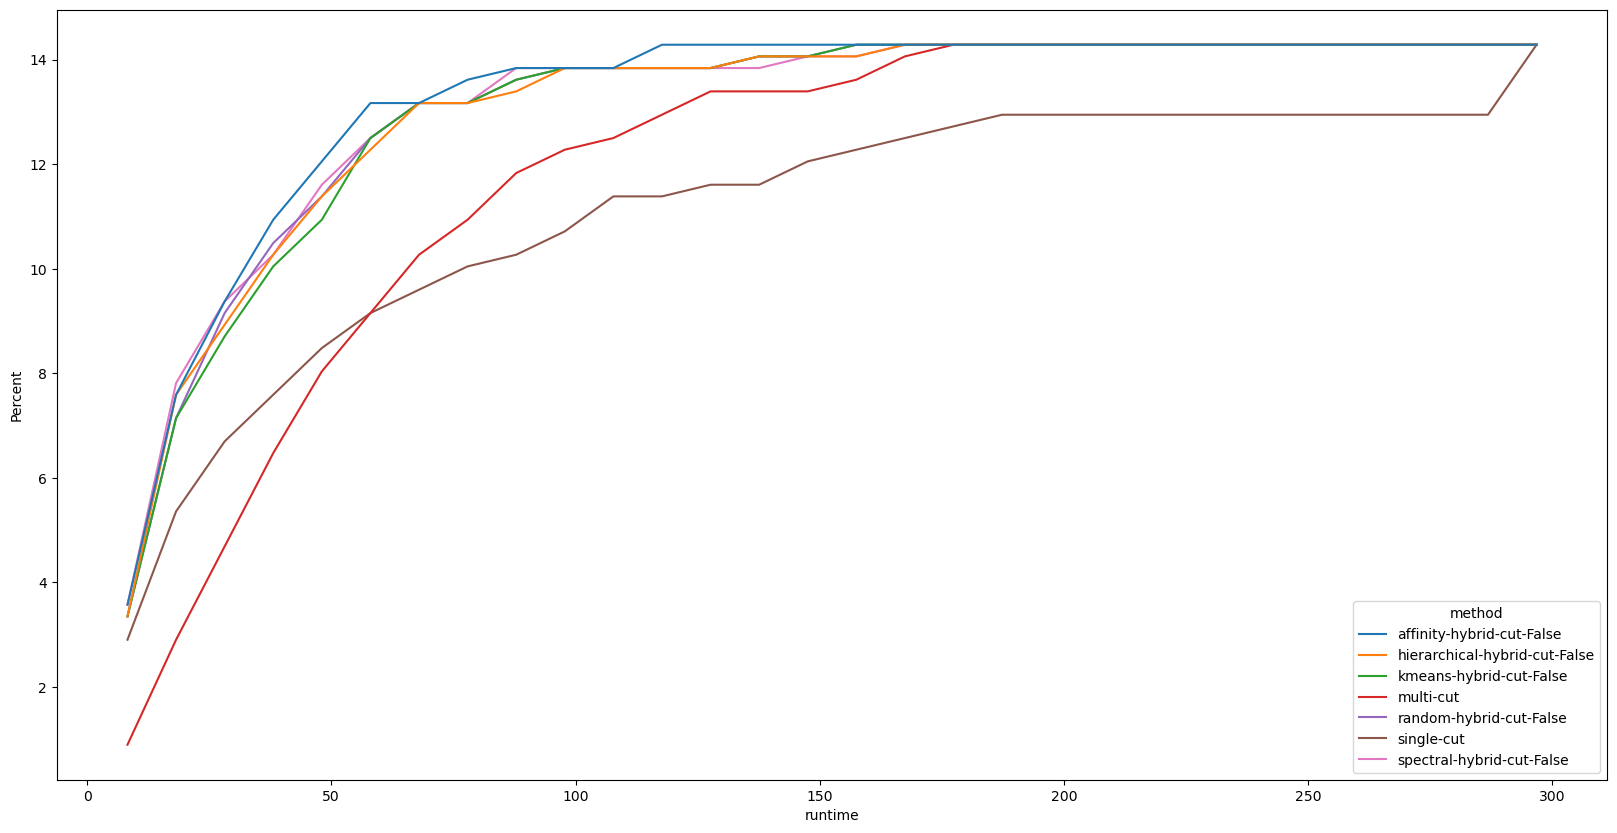

In [43]:
subset = df[(~df['dropout']) & (~df['PCA']) & (df['distribution'] == 'multipeak')]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)